* Brute-force

    Problemin karmasikligi arttigi zaman isleri zorlastiriyor.
    
    
* Greedy

    Evet cozum buluyor ancak  optimal degil

    
* Dynamic :

    Optimal bir cozum buluyor

In [1]:
import random
def rollDie():
    '''Returns a random int between 1 and 6'''
    return random.choice([1, 2, 3, 4, 5, 6])
rollDie()

1

In [2]:
def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
        print(result)
rollN(6)

3
31
311
3116
31166
311663


In [16]:
def flip(numFlips):
    """Assumes numFlips a positive int"""
    heads = 0
    for i in range(numFlips):
        if random.choice(('H', 'T')) == 'H':
            heads += 1
    return heads/float(numFlips)
flip(10)

1.0

In [51]:
def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    return mean
flipSim(10, 100)

0.49499999999999994

In [49]:
def labelPlot(numFlips, numTrials, mean, sd):
    pylab.title(str(numTrials) + ' trials of '
    + str(numFlips) + ' flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    pylab.annotate('Mean = ' + str(round(mean, 4))\
        + '\nSD = ' + str(round(sd, 4)), size='x-large',
        xycoords = 'axes fraction', xy = (0.67, 0.5))

In [6]:
def makePlots(numFlips1, numFlips2, numTrials):
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    pylab.hist(val1, bins = 20)
    xmin,xmax = pylab.xlim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    pylab.figure()
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    pylab.hist(val2, bins = 20)
    pylab.xlim(xmin, xmax)
    labelPlot(numFlips2, numTrials, mean2, sd2)

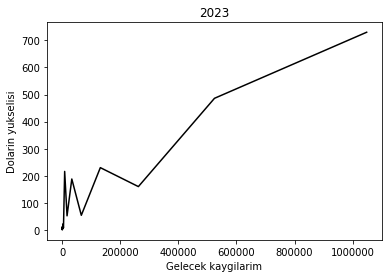

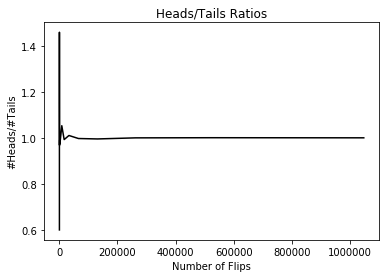

In [66]:
import pylab
def flipPlot(minExp, maxExp):
    """Assumes minExp and maxExp positive integers; minExp < maxExp
    Plots results of 2**minExp to 2**maxExp coin flips"""
    ratios, diffs, xAxis = [], [], []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.choice(('H', 'T')) == 'H':
                numHeads += 1
        numTails = numFlips - numHeads
        try:
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        except ZeroDivisionError:
            continue
    #pylab.title('Difference Between Heads and Tails')
    #pylab.xlabel('Number of Flips')
    #pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.title('2023')
    pylab.xlabel('Gelecek kaygilarim')
    pylab.ylabel('Dolarin yukselisi')
    pylab.plot(xAxis, diffs, 'k')
   
    
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, ratios, 'k')

    random.seed(0)
flipPlot(4, 20)